<a href="https://colab.research.google.com/github/gstdl/Brazilian_e-Commerce_Exploartory_Data_Analysis_and_Machine_Learning/blob/master/Brazilian_E_Commerce_EDA_%26_Cleaning_(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing Libraries and Downloading Datasets.

*Please your own kaggle token to download the files on Google Colab*

In [0]:
# !pip install yellowbrick
# !pip install mlrose
!pip install geopandas
!pip install kaggle
# !pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
!mkdir kaggle
import json
token = {"username":"use your own username","key":"use your own key"}
with open('/content/kaggle/kaggle.json','w') as file:
  json.dump(token,file)
!mkdir ../root/.kaggle
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip /content/{/content}/datasets/olistbr/brazilian-ecommerce/brazilian-ecommerce.zip

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 36.4MB/s 
     |████████████████████████████████| 10.1MB 26.5MB/s 
- path is now set to: {/content}
 68% 29.0M/42.7M [00:00<00:00, 110MB/s] 
100% 42.7M/42.7M [00:00<00:00, 143MB/s]
Archive:  /content/{/content}/datasets/olistbr/brazilian-ecommerce/brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999999999)
pd.set_option('display.max_rows', 999999999)


import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize']=(24,6)
matplotlib.style.use('seaborn-whitegrid')

# import folium

import re

import pickle

def resumetable(df):
    summary = pd.DataFrame(dict(dataFeatures=df.columns,
                             dataType=df.dtypes,
                             null=df.isna().sum(),
                             nullPct=round(df.isna().sum()/len(df)*100,2),
                             unique=df.nunique(),
#                              uniqueSample=[list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                            )).set_index('dataFeatures')
    
    for feature in summary.index:
        for s in ['mostValue','leastValue']:
            for i in range(3):
                if s=='leastValue':
                    j=-(1+i)
                else:
                    j=i
                try:
                    idx=df[feature].dropna().value_counts().index[j]
                    summary.loc[feature,f'{s}_{i+1}']=idx
                    summary.loc[feature,f'{s}Count_{i+1}']=df[feature].dropna().value_counts()[idx]
                except:
                    summary.loc[feature,f'{s}_{i+1}']='-'
                    summary.loc[feature,f'{s}Count_{i+1}']='-'
    return summary

In [0]:
dfGeolocation=pd.read_csv('olist_geolocation_dataset.csv')
dfCustomers=pd.read_csv('olist_customers_dataset.csv')
dfSellers=pd.read_csv('olist_sellers_dataset.csv')

In [0]:
dataframes=[x for x in dir() if 'df' in x]
dataframes

['dfCustomers', 'dfGeolocation', 'dfSellers']

In [0]:
dfs=[dfCustomers, dfGeolocation, dfSellers]

## EDA on Each Dataset

### Geolocation Dataset
#### Features in Geolocation Dataset

1. geolocation_zip_code_prefix = Zip Codes of a particular area in Brazil
2. geolocation_lat = Latitude of the corresponding zip code
3. geolocation_lng = Longitude of the corresponding zip code
4. geolocation_city = City of the corresponding zip code
5. geolocation_state = State of the corresponding zip code

In [0]:
dfGeolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [0]:
dfGeolocation.shape

(1000163, 5)

In [0]:
resumetable(dfGeolocation).T

dataFeatures      geolocation_zip_code_prefix geolocation_lat geolocation_lng  \
dataType                                int64         float64         float64   
null                                        0               0               0   
nullPct                                     0               0               0   
unique                                  19015          717358          717613   
mostValue_1                             24220        -27.1021        -48.6296   
mostValueCount_1                         1146             314             314   
mostValue_2                             24230        -23.4959        -46.8747   
mostValueCount_2                         1102             190             190   
mostValue_3                             38400         -23.506        -46.7174   
mostValueCount_3                          965             141             141   
leastValue_1                            38198        -23.0175        -34.8773   
leastValueCount_1                           1               1               1   
leastValue_2                            24877        -26.9749         -42.367   
leastValueCount_2                           1               1               1   
leastValue_3                            72450        -30.0279        -44.5638   
leastValueCount_3                           1               1               1   

dataFeatures      geolocation_city geolocation_state  
dataType                    object            object  
null                             0                 0  
nullPct                          0                 0  
unique                        8011                27  
mostValue_1              sao paulo                SP  
mostValueCount_1            135800            404268  
mostValue_2         rio de janeiro                MG  
mostValueCount_2             62151            126336  
mostValue_3         belo horizonte                RJ  
mostValueCount_3             27805            121169  
leastValue_1            ramilândia                RR  
leastValueCount_1                1               646  
leastValue_2          muricilandia                AP  
leastValueCount_2                1               853  
leastValue_3                 acauã                AC  
leastValueCount_3                1              1301

In [0]:
dfGeolocation.describe(include='all')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

In [0]:
dfGeolocation['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

geolocation_zip_code_prefix
count                 19015.000000
mean                     52.598633
std                      72.057907
min                       1.000000
25%                      10.000000
50%                      29.000000
75%                      66.500000
max                    1146.000000

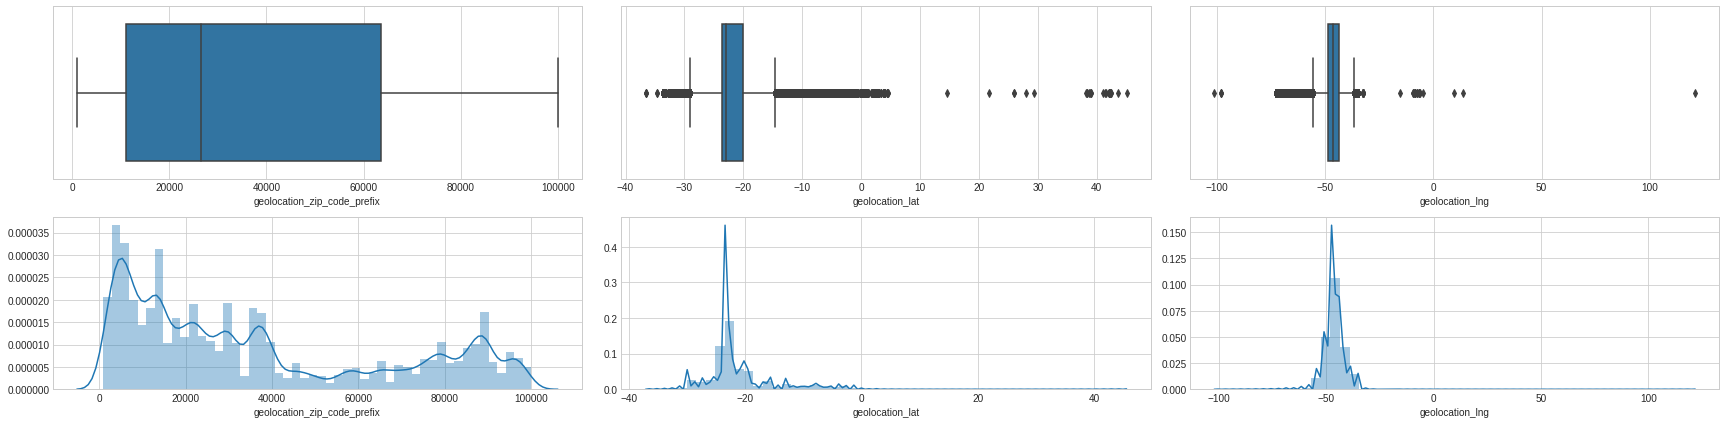

In [0]:
fig,axes=plt.subplots(2,3,figsize=(24,3*2))
for func,axe in zip([sns.boxplot,sns.distplot],axes):
    for col, ax in zip(dfGeolocation.columns[:3],axe):
        ser=dfGeolocation[col]
        func(ser,ax=ax,)
plt.tight_layout()

Total unique values in geolocation_city feature is 8011
Total unique values in geolocation_state feature is 27


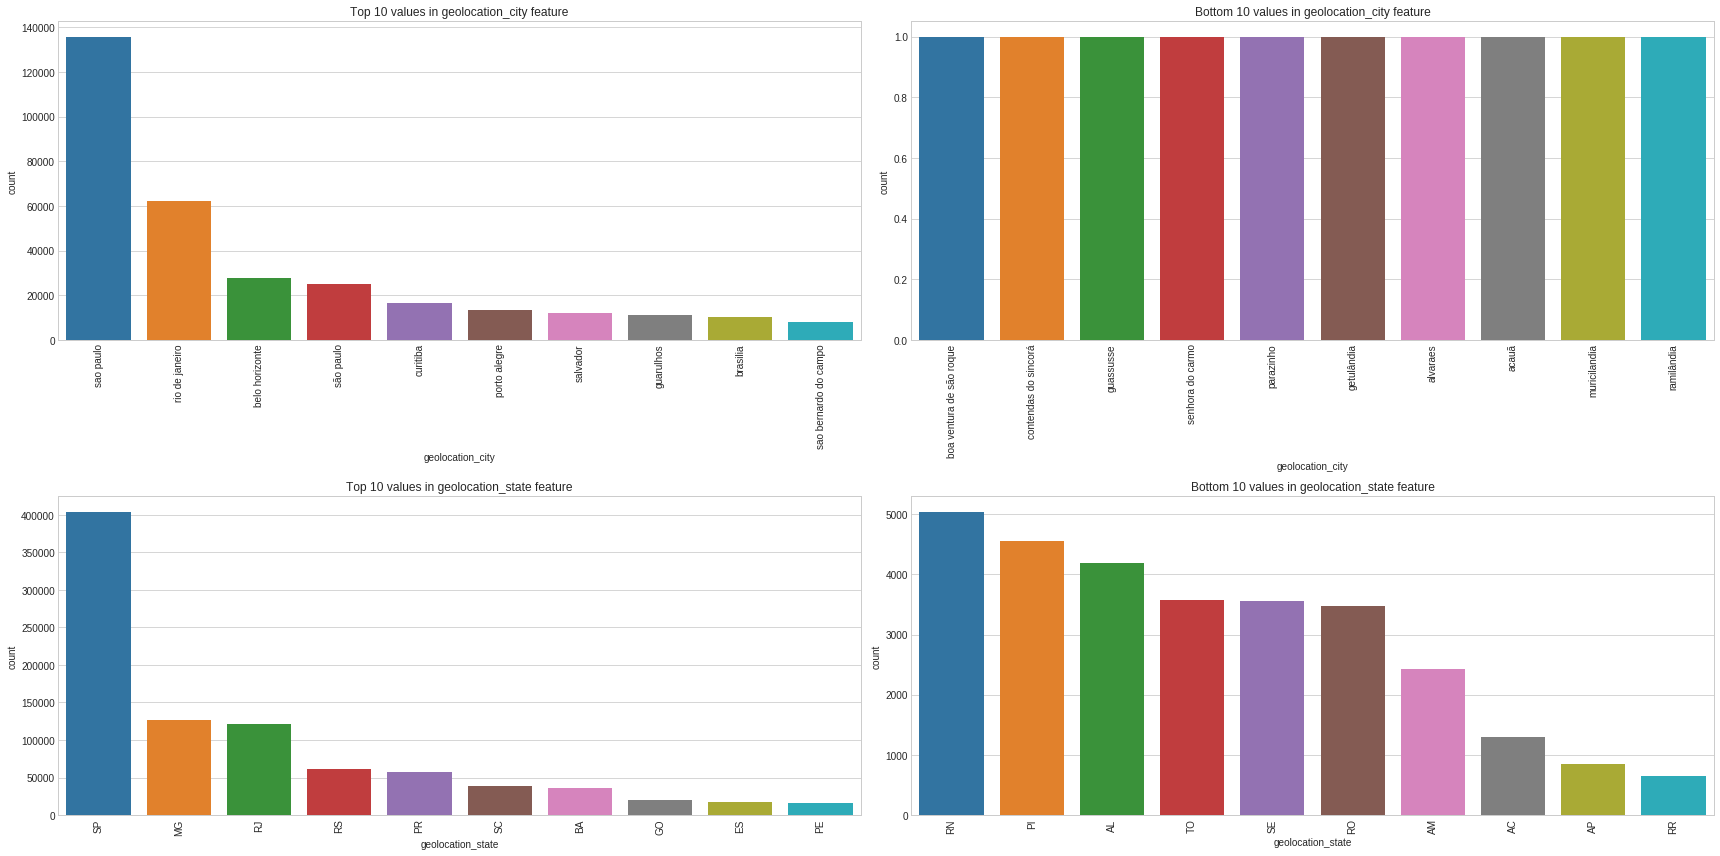

In [0]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(24,12))
for col,ax in zip(['geolocation_city','geolocation_state'],[ax1,ax2]):
    ser=dfGeolocation[col]
    sns.countplot(ser,ax=ax[0],order=ser.value_counts().head(10).index)
    ax[0].tick_params('x',labelrotation=90)
    ax[0].set_title('Top 10 values in %s feature'%(col))
    sns.countplot(ser,ax=ax[1],order=ser.value_counts().tail(10).index)
    ax[1].tick_params('x',labelrotation=90)
    ax[1].set_title('Bottom 10 values in %s feature'%(col))
    print('Total unique values in %s feature is %s'%(col,ser.nunique()))
plt.tight_layout()

In [0]:
dfGeolocation['geolocation_city'].value_counts()

sao paulo                                 135800
rio de janeiro                             62151
belo horizonte                             27805
são paulo                                  24918
curitiba                                   16593
porto alegre                               13521
salvador                                   11865
guarulhos                                  11340
brasilia                                   10470
sao bernardo do campo                       8112
osasco                                      7658
santo andre                                 6863
niteroi                                     6534
recife                                      6168
goiania                                     5661
fortaleza                                   5538
campinas                                    5479
sorocaba                                    5361
santos                                      5000
barueri                                     4971
juiz de fora        

In [0]:
import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

strip_accents('àéêöhello')

'aeeohello'

*source for the code above: https://stackoverflow.com/questions/44431730/how-to-replace-accented-characters-in-python?rq=1*

In [0]:
dfGeolocation['geolocation_city_no_accents']=dfGeolocation['geolocation_city'].apply(strip_accents)

In [0]:
dfGeolocation['geolocation_city_no_accents'].value_counts().sort_index()

* cidade                                       1
...arraial do cabo                             1
4 centenario                                   2
4o. centenario                                 1
abadia de goias                                8
abadia dos dourados                           26
abadiania                                     24
abaete                                       126
abaetetuba                                   160
abaiara                                        6
abaira                                        13
abare                                         23
abatia                                        23
abdon batista                                 10
abel figueiredo                               16
abelardo luz                                  58
abrantes                                      45
abre campo                                    39
abreu e lima                                 128
abreulandia                                    1
abreus              

Total unique values in geolocation_city feature is 8011
Total unique values in geolocation_city_no_accents feature is 5967


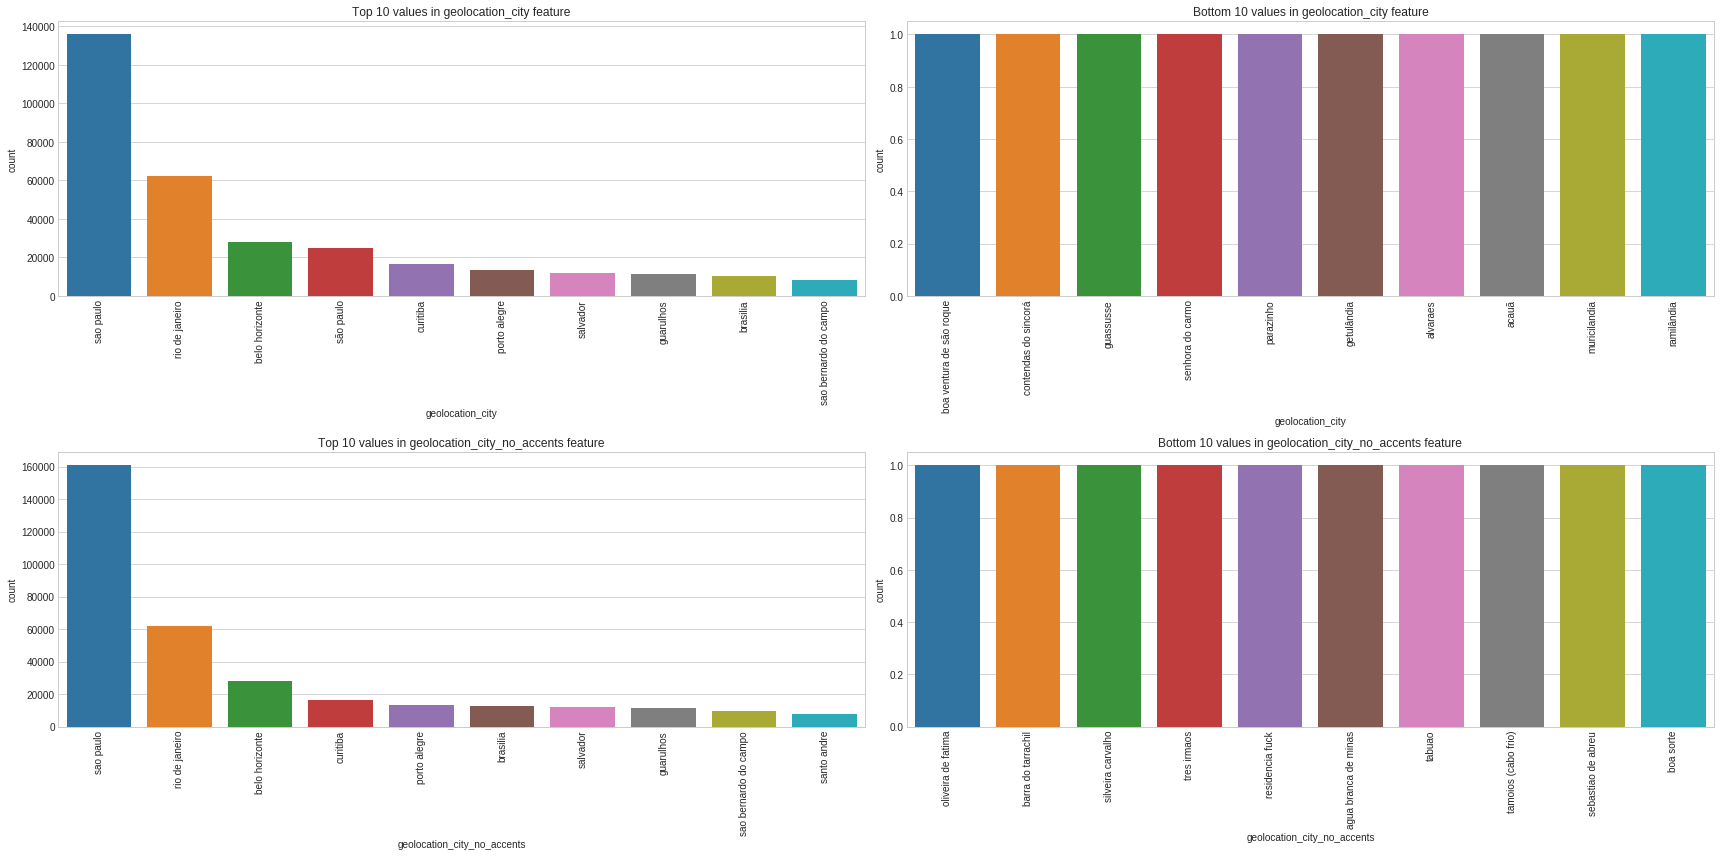

In [0]:
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(24,12))
for col,ax in zip(['geolocation_city','geolocation_city_no_accents'],[ax1,ax2]):
    ser=dfGeolocation[col]
    sns.countplot(ser,ax=ax[0],order=ser.value_counts().head(10).index)
    ax[0].tick_params('x',labelrotation=90)
    ax[0].set_title('Top 10 values in %s feature'%(col))
    sns.countplot(ser,ax=ax[1],order=ser.value_counts().tail(10).index)
    ax[1].tick_params('x',labelrotation=90)
    ax[1].set_title('Bottom 10 values in %s feature'%(col))
    print('Total unique values in %s feature is %s'%(col,ser.nunique()))
plt.tight_layout()

In [0]:
dfGeolocation['geolocation_city']=dfGeolocation['geolocation_city_no_accents']
dfGeolocation.drop('geolocation_city_no_accents',axis=1,inplace=True)

In [0]:
def zip_code_cleaning(zip_code):
    s = len(str(zip_code))
    if s==5:
        return str(zip_code)
    else:
        x=5-s
        return ('0'*x)+str(zip_code)

In [0]:
dfGeolocation['geolocation_zip_code_prefix']=dfGeolocation['geolocation_zip_code_prefix'].apply(zip_code_cleaning)
resumetable(dfGeolocation)

dataType  null  nullPct  unique mostValue_1  \
dataFeatures                                                              
geolocation_zip_code_prefix   object     0      0.0   19015       24220   
geolocation_lat              float64     0      0.0  717358    -27.1021   
geolocation_lng              float64     0      0.0  717613    -48.6296   
geolocation_city              object     0      0.0    5967   sao paulo   
geolocation_state             object     0      0.0      27          SP   

                             mostValueCount_1     mostValue_2  \
dataFeatures                                                    
geolocation_zip_code_prefix            1146.0           24230   
geolocation_lat                         314.0        -23.4959   
geolocation_lng                         314.0        -46.8747   
geolocation_city                     160719.0  rio de janeiro   
geolocation_state                    404268.0              MG   

                             mostValueCount_2     mostValue_3  \
dataFeatures                                                    
geolocation_zip_code_prefix            1102.0           38400   
geolocation_lat                         190.0         -23.506   
geolocation_lng                         190.0        -46.7174   
geolocation_city                      62151.0  belo horizonte   
geolocation_state                    126336.0              RJ   

                             mostValueCount_3 leastValue_1  leastValueCount_1  \
dataFeatures                                                                    
geolocation_zip_code_prefix             965.0        18306                1.0   
geolocation_lat                         141.0     -23.0175                1.0   
geolocation_lng                         141.0     -34.8773                1.0   
geolocation_city                      27805.0    boa sorte                1.0   
geolocation_state                    121169.0           RR              646.0   

                                   leastValue_2  leastValueCount_2  \
dataFeatures                                                         
geolocation_zip_code_prefix               84190                1.0   
geolocation_lat                        -26.9749                1.0   
geolocation_lng                         -42.367                1.0   
geolocation_city             sebastiao de abreu                1.0   
geolocation_state                            AP              853.0   

                                    leastValue_3  leastValueCount_3  
dataFeatures                                                         
geolocation_zip_code_prefix                40433                1.0  
geolocation_lat                         -30.0279                1.0  
geolocation_lng                         -44.5638                1.0  
geolocation_city             tamoios (cabo frio)                1.0  
geolocation_state                             AC             1301.0

In [0]:
dfGeolocation[dfGeolocation['geolocation_city']=='sao paulo'].drop_duplicates('geolocation_state',keep='first')

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                           01037       -23.545621       -46.639292   
22261                       02116       -23.515978       -46.582170   
72852                       04011       -23.578707       -46.645779   

      geolocation_city geolocation_state  
0            sao paulo                SP  
22261        sao paulo                RN  
72852        sao paulo                AC

In [0]:
dfGeolocation[dfGeolocation['geolocation_state']=='SP'].drop_duplicates('geolocation_city',keep='first').head(8)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                            01037       -23.545621       -46.639292   
10166                        01307       -23.556812       -46.657135   
50999                        03203       -23.216648       -46.861371   
71908                        04004       -23.574798       -46.650106   
80754                        04132       -23.622721       -46.620360   
85839                        04346       -23.640365       -46.652122   
126613                       05372       -23.188135       -45.887705   
148126                       06036       -23.559508       -46.775873   

             geolocation_city geolocation_state  
0                   sao paulo                SP  
10166   sao bernardo do campo                SP  
50999                 jundiai                SP  
71908         taboao da serra                SP  
80754                saopaulo                SP  
85839                      sp                SP  
126613    sao jose dos campos                SP  
148126                 osasco                SP

In [0]:
dfGeolocation['geolocation_zip_code_prefix'].describe()

count     1000163
unique      19015
top         24220
freq         1146
Name: geolocation_zip_code_prefix, dtype: object

In [0]:
dfGeolocation[dfGeolocation['geolocation_zip_code_prefix']=='24220']

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                       24220       -22.905817       -43.106989   
470811                       24220       -22.902306       -43.112545   
470812                       24220       -22.904567       -43.110491   
470820                       24220       -22.902575       -43.109192   
470821                       24220       -22.907500       -43.106170   
470823                       24220       -22.904319       -43.113001   
470824                       24220       -22.899014       -43.106746   
470826                       24220       -22.907401       -43.098585   
470828                       24220       -22.903061       -43.109014   
470829                       24220       -22.901422       -43.110802   
470839                       24220       -22.899325       -43.108217   
470840                       24220       -22.902553       -43.105805   
470844                       24220       -22.899014       -43.106746   
470846                       24220       -22.908591       -43.107320   
470851                       24220       -22.899746       -43.112179   
470853                       24220       -22.906557       -43.111618   
470855                       24220       -22.902175       -43.109950   
470856                       24220       -22.901401       -43.102772   
470859                       24220       -22.901616       -43.113823   
470870                       24220       -22.904009       -43.112701   
470871                       24220       -22.906420       -43.104933   
470875                       24220       -22.902974       -43.113223   
470877                       24220       -22.905555       -43.099146   
470878                       24220       -22.902497       -43.107159   
470880                       24220       -22.903640       -43.103572   
470882                       24220       -22.909633       -43.108452   
470887                       24220       -22.903408       -43.101582   
470888                       24220       -22.899995       -43.108132   
470889                       24220       -22.901744       -43.105213   
470890                       24220       -22.904961       -43.109865   
470892                       24220       -22.905704       -43.099008   
470901                       24220       -22.902396       -43.100493   
470903                       24220       -22.904310       -43.110311   
470905                       24220       -22.900462       -43.104638   
470908                       24220       -22.904023       -43.111683   
470912                       24220       -22.904316       -43.100455   
470916                       24220       -22.902358       -43.102991   
470918                       24220       -22.905595       -43.107126   
470919                       24220       -22.900465       -43.108122   
470927                       24220       -22.901379       -43.102286   
470933                       24220       -22.906880       -43.100773   
470937                       24220       -22.904961       -43.109865   
470941                       24220       -22.899420       -43.092702   
470945                       24220       -22.899014       -43.106746   
470946                       24220       -22.907584       -43.101560   
470948                       24220       -22.909459       -43.108119   
470954                       24220       -22.906559       -43.111760   
470955                       24220       -22.906171       -43.104583   
470957                       24220       -22.902985       -43.111531   
470958                       24220       -22.899396       -43.092914   
470959                       24220       -22.902489       -43.114782   
470963                       24220       -22.900674       -43.107835   
470968                       24220       -22.902551       -43.114863   
470974                       24220       -22.906126       -43.109530   
470978                       24220       -22.89

In [0]:
geo=gpd.GeoDataFrame(dfGeolocation, geometry=gpd.points_from_xy(dfGeolocation['geolocation_lng'], dfGeolocation['geolocation_lat']))
geo.crs = {'init': 'epsg:4326'}
geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state                     geometry  
0        sao paulo                SP  POINT (-46.63929 -23.54562)  
1        sao paulo                SP  POINT (-46.64482 -23.54608)  
2        sao paulo                SP  POINT (-46.64295 -23.54613)  
3        sao paulo                SP  POINT (-46.63950 -23.54439)  
4        sao paulo                SP  POINT (-46.64161 -23.54158)

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

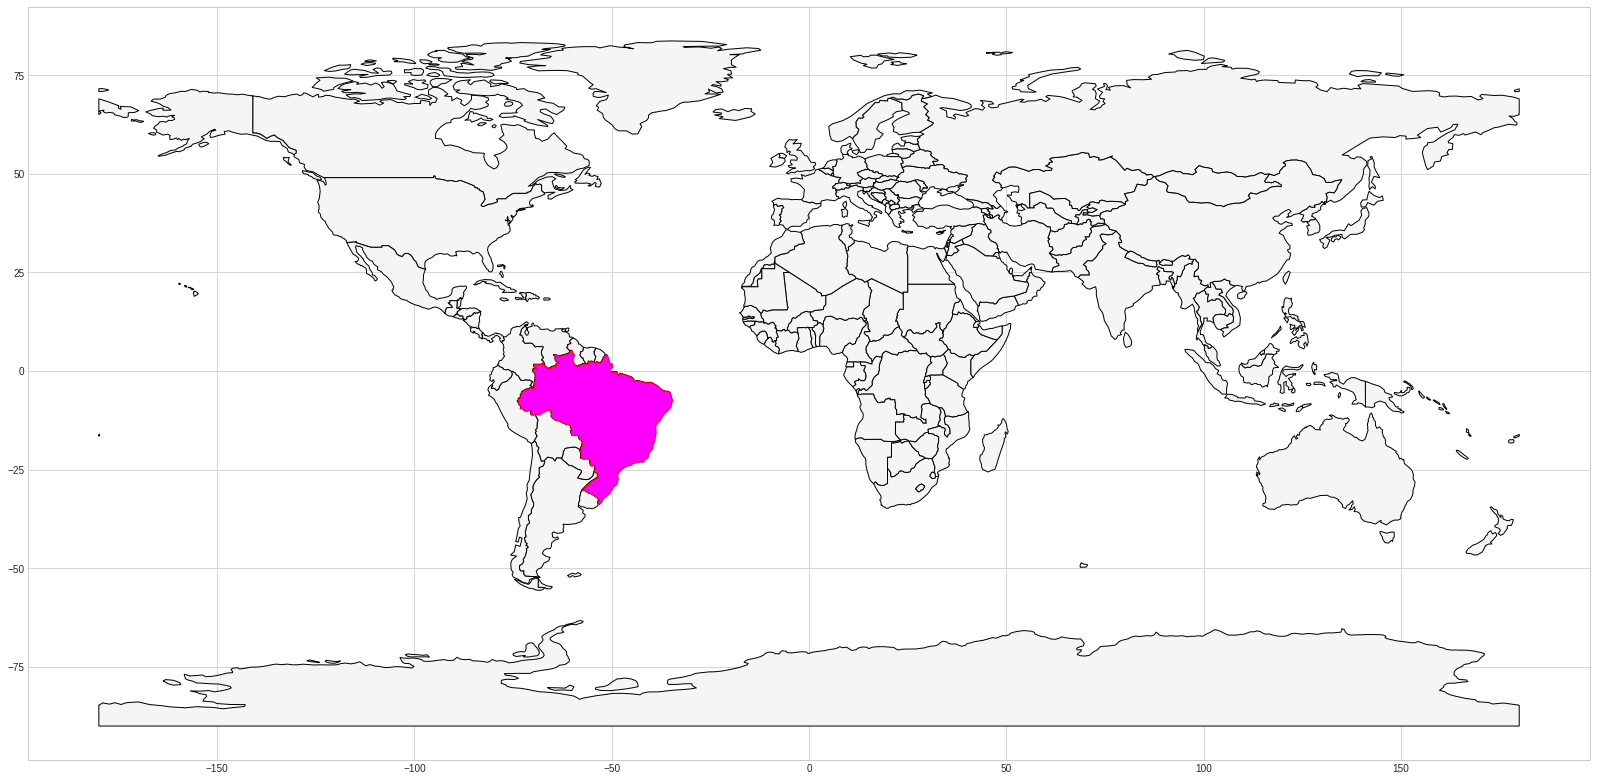

In [0]:
brazil=world[world['name']=='Brazil']
ax=world.plot(color='whitesmoke',edgecolor='black',figsize=(28,20))
brazil.plot(ax=ax,edgecolor='red',color='magenta')
# geo.plot(ax=ax,color='blue',alpha=0.5)

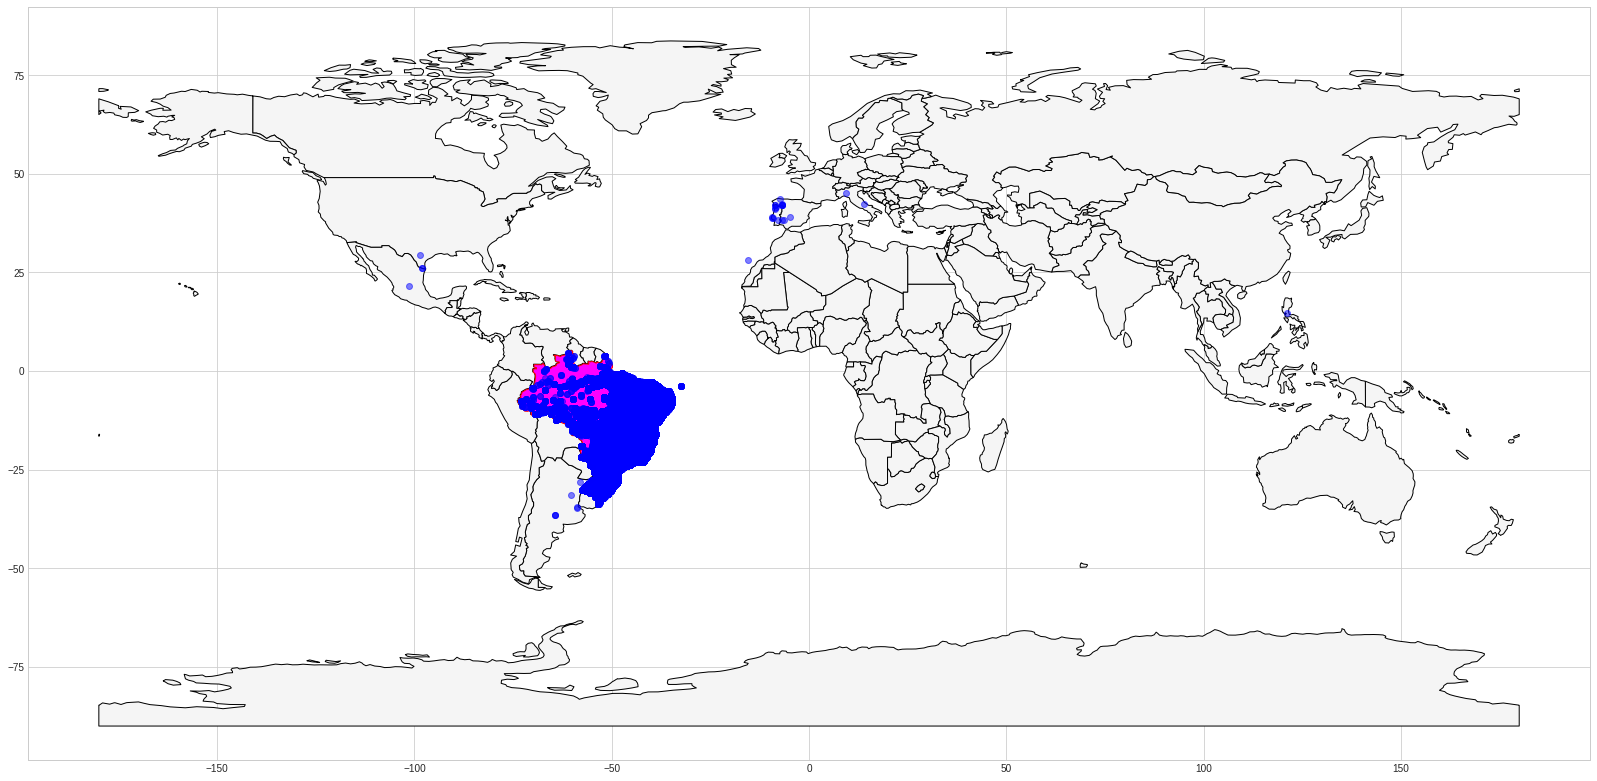

In [0]:
ax=world.plot(color='whitesmoke',edgecolor='black',figsize=(28,20))
brazil.plot(ax=ax,edgecolor='red',color='magenta')
geo.plot(ax=ax,color='blue',alpha=0.5)

In [0]:
# #Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
# geo = geo[geo.geolocation_lat <= 5.27438888]
# #it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
# geo = geo[geo.geolocation_lng >= -73.98283055]
# #It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
# geo = geo[geo.geolocation_lat >= -33.75116944]
# #It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
# geo = geo[geo.geolocation_lng <=  -34.79314722]

In [0]:
def in_brazil(cols):
    lat=-33.75116944<=cols['geolocation_lat']<=5.27438888
    lng=-73.98283055<=cols['geolocation_lng']<=-34.79314722
    if lat and lng:
        return 1
    else:
        return 0

In [0]:
geo['in_brazil']=geo.apply(in_brazil,axis=1)
print(geo['in_brazil'].sum())
print(geo.shape)

1000121
(1000163, 7)


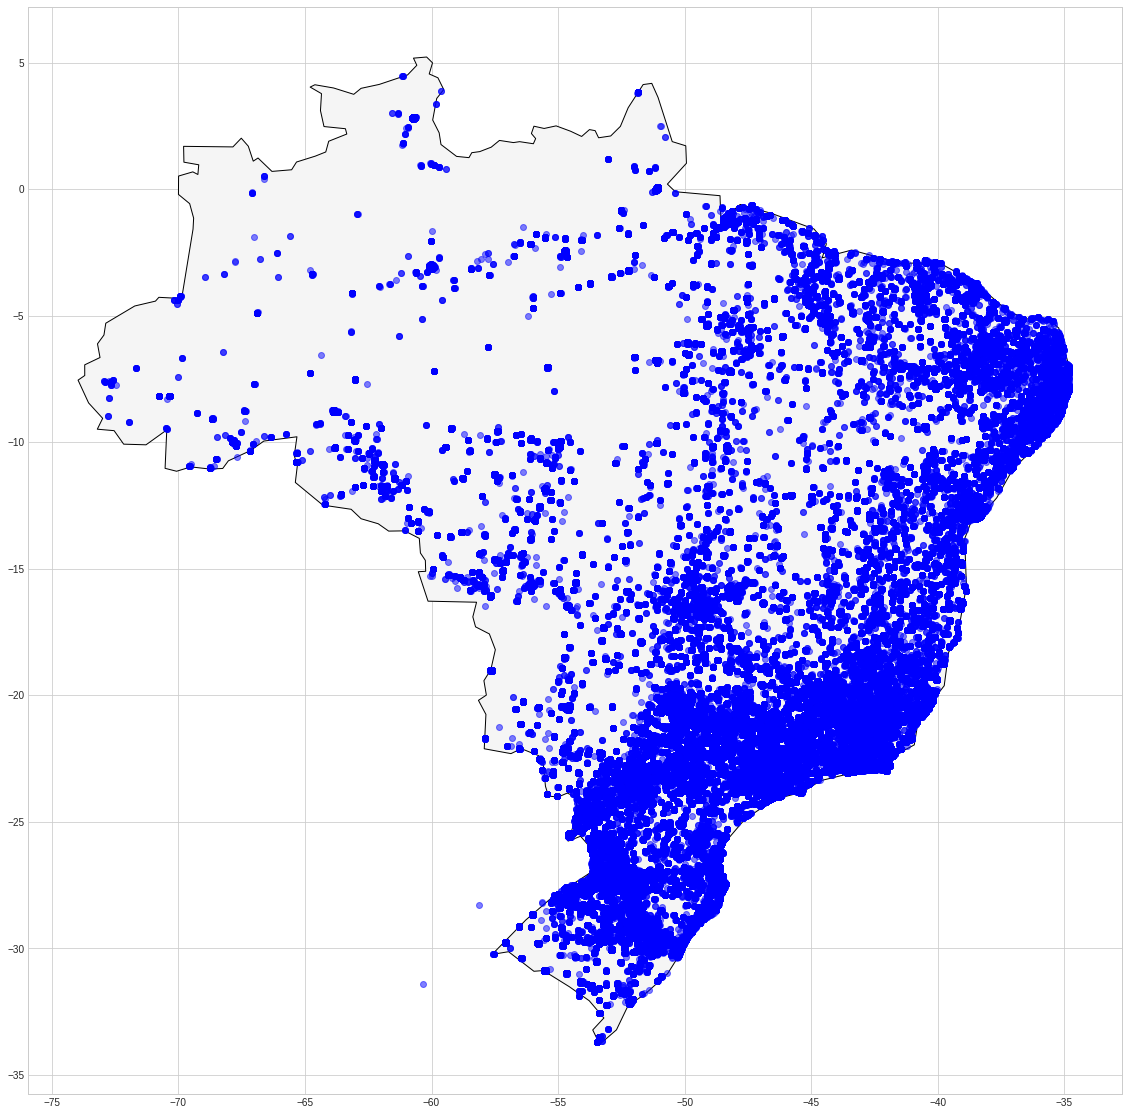

In [0]:
# brazil=world[world['name']=='Brazil']
ax=brazil.plot(color='whitesmoke',edgecolor='black',figsize=(28,20))
# brazil.plot(ax=ax,edgecolor='red',color='magenta')
geo[geo['in_brazil']==1].plot(ax=ax,color='blue',alpha=0.5)

In [0]:
resumetable(geo[geo['in_brazil']==1])

dataType  null  nullPct  unique mostValue_1  \
dataFeatures                                                               
geolocation_zip_code_prefix    object     0      0.0   19010       24220   
geolocation_lat               float64     0      0.0  717325    -27.1021   
geolocation_lng               float64     0      0.0  717580    -48.6296   
geolocation_city               object     0      0.0    5963   sao paulo   
geolocation_state              object     0      0.0      27          SP   
geometry                     geometry     0      0.0  718430           -   
in_brazil                       int64     0      0.0       1           1   

                            mostValueCount_1     mostValue_2 mostValueCount_2  \
dataFeatures                                                                    
geolocation_zip_code_prefix             1146           24230             1102   
geolocation_lat                          314        -23.4959              190   
geolocation_lng                          314        -46.8747              190   
geolocation_city                      160719  rio de janeiro            62151   
geolocation_state                     404267              MG           126334   
geometry                                   -               -                -   
in_brazil                            1000121               -                -   

                                mostValue_3 mostValueCount_3 leastValue_1  \
dataFeatures                                                                
geolocation_zip_code_prefix           38400              965        63632   
geolocation_lat                     -23.506              141     -23.0175   
geolocation_lng                    -46.7174              141     -34.8773   
geolocation_city             belo horizonte            27805      bizarra   
geolocation_state                        RJ           121164           RR   
geometry                                  -                -            -   
in_brazil                                 -                -            1   

                            leastValueCount_1 leastValue_2 leastValueCount_2  \
dataFeatures                                                                   
geolocation_zip_code_prefix                 1        15610                 1   
geolocation_lat                             1     -30.0279                 1   
geolocation_lng                             1     -44.5638                 1   
geolocation_city                            1      fonseca                 1   
geolocation_state                         646           AP               853   
geometry                                    -            -                 -   
in_brazil                             1000121            -                 -   

                                                  leastValue_3  \
dataFeatures                                                     
geolocation_zip_code_prefix                              18216   
geolocation_lat                                       -3.79603   
geolocation_lng                                       -51.1313   
geolocation_city             monte gordo (camacari) - distrito   
geolocation_state                                           AC   
geometry                                                     -   
in_brazil                                                    -   

                            leastValueCount_3  
dataFeatures                                   
geolocation_zip_code_prefix                 1  
geolocation_lat                             1  
geolocation_lng                             1  
geolocation_city                            1  
geolocation_state                        1301  
geometry                                    -  
in_brazil                                   -

In [0]:
resumetable(geo[geo['in_brazil']==0])

dataType  null  nullPct  unique  \
dataFeatures                                                   
geolocation_zip_code_prefix    object     0      0.0      21   
geolocation_lat               float64     0      0.0      33   
geolocation_lng               float64     0      0.0      33   
geolocation_city               object     0      0.0      22   
geolocation_state              object     0      0.0      12   
geometry                     geometry     0      0.0      33   
in_brazil                       int64     0      0.0       1   

                                     mostValue_1 mostValueCount_1  \
dataFeatures                                                        
geolocation_zip_code_prefix                53990               11   
geolocation_lat                          42.1673                3   
geolocation_lng                         -6.89856                3   
geolocation_city             fernando de noronha               11   
geolocation_state                             PE               11   
geometry                                       -                -   
in_brazil                                      0               42   

                                 mostValue_2 mostValueCount_2 mostValue_3  \
dataFeatures                                                                
geolocation_zip_code_prefix            68275                5       98780   
geolocation_lat                     -3.85309                3    -36.6038   
geolocation_lng                     -32.4235                3     -32.406   
geolocation_city             porto trombetas                5  santa rosa   
geolocation_state                         PA                7          RJ   
geometry                                   -                -           -   
in_brazil                                  -                -           -   

                            mostValueCount_3 leastValue_1 leastValueCount_1  \
dataFeatures                                                                  
geolocation_zip_code_prefix                3        68379                 1   
geolocation_lat                            2       38.992                 1   
geolocation_lng                            2     -7.41108                 1   
geolocation_city                           3       raposo                 1   
geolocation_state                          5           MT                 1   
geometry                                   -            -                 -   
in_brazil                                  -            0                42   

                            leastValue_2 leastValueCount_2 leastValue_3  \
dataFeatures                                                              
geolocation_zip_code_prefix        28595                 1        83810   
geolocation_lat                 -3.85251                 1     -34.6224   
geolocation_lng                 -8.57786                 1     -4.94782   
geolocation_city              pau d'arco                 1      portela   
geolocation_state                     AL                 1           SP   
geometry                               -                 -            -   
in_brazil                              -                 -            -   

                            leastValueCount_3  
dataFeatures                                   
geolocation_zip_code_prefix                 1  
geolocation_lat                             1  
geolocation_lng                             1  
geolocation_city                            1  
geolocation_state                           1  
geometry                                    -  
in_brazil                                   -

In [0]:
geo[geo['geolocation_city'].isin(geo[geo['in_brazil']==0]['geolocation_city'])].shape

(3182, 7)

In [0]:
resumetable(geo[geo['geolocation_city'].isin(geo[geo['in_brazil']==0]['geolocation_city'])])

dataType  null  nullPct  unique  mostValue_1  \
dataFeatures                                                                
geolocation_zip_code_prefix    object     0      0.0      89        97015   
geolocation_lat               float64     0      0.0    2407     -29.7043   
geolocation_lng               float64     0      0.0    2402      -53.707   
geolocation_city               object     0      0.0      22  santa maria   
geolocation_state              object     0      0.0      16           RS   
geometry                     geometry     0      0.0    2408            -   
in_brazil                       int64     0      0.0       2            1   

                            mostValueCount_1 mostValue_2 mostValueCount_2  \
dataFeatures                                                                
geolocation_zip_code_prefix              374       97050              257   
geolocation_lat                           17    -29.7135               16   
geolocation_lng                           17     -53.786               16   
geolocation_city                        2040  santa rosa              500   
geolocation_state                       2522          MT              440   
geometry                                   -           -                -   
in_brazil                               3140           0               42   

                               mostValue_3 mostValueCount_3  \
dataFeatures                                                  
geolocation_zip_code_prefix          97010              251   
geolocation_lat                   -29.7117               15   
geolocation_lng                   -53.7165               15   
geolocation_city             varzea grande              445   
geolocation_state                       MG               95   
geometry                                 -                -   
in_brazil                                -                -   

                                    leastValue_1 leastValueCount_1  \
dataFeatures                                                         
geolocation_zip_code_prefix                78165                 1   
geolocation_lat                         -29.6692                 1   
geolocation_lng                         -53.7646                 1   
geolocation_city             santa lucia do piai                 1   
geolocation_state                             AL                 1   
geometry                                       -                 -   
in_brazil                                      0                42   

                                        leastValue_2 leastValueCount_2  \
dataFeatures                                                             
geolocation_zip_code_prefix                    59464                 1   
geolocation_lat                             -29.6989                 1   
geolocation_lng                             -53.7056                 1   
geolocation_city             bom retiro da esperanca                 1   
geolocation_state                                 RN                 1   
geometry                                           -                 -   
in_brazil                                          1              3140   

                                   leastValue_3 leastValueCount_3  
dataFeatures                                                       
geolocation_zip_code_prefix               72506                 1  
geolocation_lat                        -29.7074                 1  
geolocation_lng                        -56.1395                 1  
geolocation_city             ilha dos valadares                 2  
geolocation_state                            SP                 1  
geometry                                      -                 -  
in_brazil                                     -                 -

In [0]:
geo[geo['geolocation_city'].isin(geo[geo['in_brazil']==0]['geolocation_city'])].sort_values(['geolocation_city','in_brazil','geolocation_state','geolocation_zip_code_prefix'])

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
865611                       83810        39.057629        -9.400037   
865681                       83810       -22.678097       -50.436930   
865981                       83810        -4.951638       -37.131545   
865997                       83810       -22.668255       -50.420041   
866113                       83810       -25.869440       -49.365830   
387565                       18243        28.008978       -15.536867   
769924                       68379        38.713128        -9.135741   
769524                       68379       -20.615002       -41.206066   
715892                       53990        -3.845491       -32.413367   
715893                       53990        -3.853092       -32.423525   
715896                       53990        -3.846930       -32.415821   
715900                       53990        -3.848319       -32.412384   
715908                       53990        -3.853092       -32.423525   
715911                       53990        -3.848319       -32.412384   
715912                       53990        -3.844080       -32.405985   
715913                       53990        -3.846930       -32.415821   
715914                       53990        -3.852505       -32.402779   
715915                       53990        -3.844080       -32.405985   
715916                       53990        -3.853092       -32.423525   
697048                       46560        38.991963        -4.947823   
696987                       46560       -12.989122       -42.220055   
860562                       83252        42.184003        -8.723762   
860832                       83252        42.184003        -8.723762   
695375                       45936       -34.622400       -58.901888   
694790                       45936       -17.999945       -39.868270   
694792                       45936       -12.903227       -38.308831   
694905                       45936       -18.000329       -39.867793   
694910                       45936       -12.807618       -38.395391   
694939                       45936       -18.010597       -39.864476   
694996                       45936       -18.006772       -39.863218   
695000                       45936       -14.670199       -40.489571   
695014                       45936       -12.921859       -38.441688   
695098                       45936       -17.998612       -39.863092   
695113                       45936       -12.903227       -38.308831   
695285                       45936       -12.903227       -38.308831   
695384                       45936       -12.971700       -38.513649   
695459                       45936       -12.168931       -45.005067   
695462                       45936       -18.007946       -39.863437   
695517                       45936       -12.953699       -38.399041   
695553                       45936       -11.301073       -41.844488   
695377                       45936        38.323939        -6.775035   
694783                       45936       -12.883913       -38.478122   
694832                       45936       -12.921871       -38.491053   
695033                       45936       -12.972809       -38.492293   
695082                       45936       -18.000563       -39.872925   
695179                       45936       -18.006458       -39.863305   
695272                       45936       -18.004717       -39.862340   
695293                       45936       -18.000833       -39.866641   
695380                       45936       -18.011086       -39.854250   
695383                       45936       -12.881923       -38.480661   
695437                       45936       -15.812589       -40.216908   
695536                       45936       -18.007846       -39.863429   
695560                       45936       -18.011263       -39.853380   
727755                       57319        45.065933         9.341528   
771047                       68545        -7.83

In [0]:
# geo=['geolocation_zip_code_prefix','geolocation_city','geolocation_state']
# gb_geo=dfGeolocation.groupby(geo).agg(['count','mean','std'])

# def join_location(cols):
#     z,c,s = cols[0],cols[1],cols[2]
#     return '{}_{}_{}'.format(z,c,s)

# def mean_long(cols):
#     z,c,s = cols[0],cols[1],cols[2]
#     return gb_geo.loc[(z,c,s),('geolocation_lng','mean')]

# def mean_lat(cols):
#     z,c,s = cols[0],cols[1],cols[2]
#     return gb_geo.loc[(z,c,s),('geolocation_lat','mean')]

# def freq(cols):
#     z,c,s = cols[0],cols[1],cols[2]
#     return gb_geo.loc[(z,c,s),('geolocation_lat','count')]

In [0]:
# gb_geo.head()

In [0]:
# for col in ['geolocation_lng','geolocation_lat']:
#     print(col, 'average std is', gb_geo[col]['std'].mean())

In [0]:
# dfGeolocation.drop_duplicates(geo,keep='first',inplace=True)
# for col,func in zip(['location','longitude','latitude','frequency'],[join_location,mean_long,mean_lat,freq]):
#     dfGeolocation[col]=dfGeolocation[geo].apply(func,axis=1)

In [0]:
cs=['geolocation_city','geolocation_state']
gb_freq=dfGeolocation.groupby(['geolocation_zip_code_prefix',*cs]).count()

In [0]:
# def join_location(cols):
#     c,s = cols[0],cols[1]
#     return '{}, {}'.format(c,s)

# def freq(cols):
#     z,c,s = cols[0],cols[1],cols[2]
#     return gb_geo.loc[(z,c,s),'geolocation_lat']

dfGeolocation['cs']=dfGeolocation[cs].apply(lambda c: '{}, {}'.format(c[0],c[1]), axis=1)
dfGeolocation['frequency_in_dfGeolocation']=dfGeolocation[['geolocation_zip_code_prefix',*cs]].apply(lambda c: gb_freq.loc[(c[0],c[1],c[2]),'geolocation_lat'],axis=1)
dfGeolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state                     geometry  in_brazil  \
0        sao paulo                SP  POINT (-46.63929 -23.54562)          1   
1        sao paulo                SP  POINT (-46.64482 -23.54608)          1   
2        sao paulo                SP  POINT (-46.64295 -23.54613)          1   
3        sao paulo                SP  POINT (-46.63950 -23.54439)          1   
4        sao paulo                SP  POINT (-46.64161 -23.54158)          1   

              cs  frequency_in_dfGeolocation  
0  sao paulo, SP                          26  
1  sao paulo, SP                         141  
2  sao paulo, SP                         141  
3  sao paulo, SP                          25  
4  sao paulo, SP                          39

*Please use your own API key*

In [0]:
!pip install googlemaps
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='Use your own API Key')

# Geocoding an address
geocode_result = gmaps.geocode('sao paulo, SP')

In [0]:
geocode_result

[{'address_components': [{'long_name': 'São Paulo',
    'short_name': 'São Paulo',
    'types': ['locality', 'political']},
   {'long_name': 'São Paulo',
    'short_name': 'São Paulo',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'State of São Paulo',
    'short_name': 'SP',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'Brazil',
    'short_name': 'BR',
    'types': ['country', 'political']}],
  'formatted_address': 'São Paulo, State of São Paulo, Brazil',
  'geometry': {'bounds': {'northeast': {'lat': -23.3566039,
     'lng': -46.3650844},
    'southwest': {'lat': -24.0082209, 'lng': -46.825514}},
   'location': {'lat': -23.5505199, 'lng': -46.63330939999999},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': -23.3566039, 'lng': -46.3650844},
    'southwest': {'lat': -24.0082209, 'lng': -46.825514}}},
  'place_id': 'ChIJ0WGkg4FEzpQRrlsz_whLqZs',
  'types': ['locality', 'political']}]

In [0]:
lat,lng=geocode_result[0]['geometry']['location']['lat'],geocode_result[0]['geometry']['location']['lng']
print(lat)
print(lng)

-23.5505199
-46.63330939999999


In [0]:
dfGeolocation.shape

(1000163, 9)

In [0]:
cs_unique=dfGeolocation['cs'].unique()
print(len(cs_unique))

6348


In [0]:
lat_lng={i:gmaps.geocode(i)[0]['geometry']['location'] for i in cs_unique}

IndexError: ignored

#### Cleaning

1. Changed zip_code_prefix type from integers to string (to keep the zip code consistent with 5 digits, including zip codes starting with 0)
2. Stripped accents from city name

#### Interesting Insights

1. There are inconsistency in the data on longitude and latitude. This problem causes cities to be identified outside of Brazil when they're supposed to be inside Brazil

#### Problems Faced

1. Tried cleaning geolocation by using Google Maps Geocoding API but failed due to API key limit

### Customers Dataset
#### Features in Customers Dataset

1. customer_id = Generated ID for each customer in the dataset (this feature is the primary key for dataset merging)
2. customer_unique_id = ID Generated for every new customer in the dataset. This means that a single customer can have multiple customer_id's but will only have one customer_unique_id
3. customer_zip_code_prefix = Zip code where the order should be delivered to
4. customer_city = City where the order should be delivered to
5. customer_state = State where the order should be delivered to

In [0]:
dfCustomers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [0]:
dfCustomers.shape

(99441, 5)

In [0]:
resumetable(dfCustomers).T

dataFeatures                            customer_id  \
dataType                                     object   
null                                              0   
nullPct                                           0   
unique                                        99441   
mostValue_1        8b5399b12eee8f2ce9e7fadd94b15d34   
mostValueCount_1                                  1   
mostValue_2        af6838e132cd4b57f17378cfeca1d011   
mostValueCount_2                                  1   
mostValue_3        40c17557e54ccd8ccb7f592a2c1ce94f   
mostValueCount_3                                  1   
leastValue_1       688c5a754325b8c84629b9b436f9f51e   
leastValueCount_1                                 1   
leastValue_2       7225c41233573a5e698cddb894951e51   
leastValueCount_2                                 1   
leastValue_3       829961c76df2892a3b50656daaa764ed   
leastValueCount_3                                 1   

dataFeatures                     customer_unique_id customer_zip_code_prefix  \
dataType                                     object                    int64   
null                                              0                        0   
nullPct                                           0                        0   
unique                                        96096                    14994   
mostValue_1        8d50f5eadf50201ccdcedfb9e2ac8455                    22790   
mostValueCount_1                                 17                      142   
mostValue_2        3e43e6105506432c953e165fb2acf44c                    24220   
mostValueCount_2                                  9                      124   
mostValue_3        1b6c7548a2a1f9037c1fd3ddfed95f33                    22793   
mostValueCount_3                                  7                      121   
leastValue_1       ac43eb575838c88069e068dd164dd392                    39113   
leastValueCount_1                                 1                        1   
leastValue_2       62710d18d2fc51ed913093daac4e9b0f                    44023   
leastValueCount_2                                 1                        1   
leastValue_3       62c54bb25534d79bbbd52c3d9de4c1bc                    56313   
leastValueCount_3                                 1                        1   

dataFeatures         customer_city customer_state  
dataType                    object         object  
null                             0              0  
nullPct                          0              0  
unique                        4119             27  
mostValue_1              sao paulo             SP  
mostValueCount_1             15540          41746  
mostValue_2         rio de janeiro             RJ  
mostValueCount_2              6882          12852  
mostValue_3         belo horizonte             MG  
mostValueCount_3              2773          11635  
leastValue_1        porto murtinho             RR  
leastValueCount_1                1             46  
leastValue_2       porto de pedras             AP  
leastValueCount_2                1             68  
leastValue_3            porto rico             AC  
leastValueCount_3                1             81

In [0]:
customer_unique_id_more_than_1=dfCustomers['customer_unique_id'].value_counts()[dfCustomers['customer_unique_id'].value_counts()>1]
len(customer_unique_id_more_than_1)

2997

In [0]:
abc=[]
for idx in dfCustomers.index:
    if dfCustomers.loc[idx,'customer_id']==dfCustomers.loc[idx,'customer_unique_id']:
        abc.append(idx)
abc

[]

In [0]:
dfCustomers[dfCustomers['customer_unique_id'].isin(customer_unique_id_more_than_1.index[0:3])].sort_values('customer_unique_id')

customer_id                customer_unique_id  \
7012   53e16f83735cfe02bf83ef6481ca241e  1b6c7548a2a1f9037c1fd3ddfed95f33   
66714  ee5c2e36a79081c2440e61990ec2f3af  1b6c7548a2a1f9037c1fd3ddfed95f33   
12164  95b9cacc4bc81c3a0a33967bcde6fcd8  1b6c7548a2a1f9037c1fd3ddfed95f33   
65287  9a4578c9dd9dce6517d583cb5eca0276  1b6c7548a2a1f9037c1fd3ddfed95f33   
50663  c2ff01bd4fa72f9487ee397f6c5989d2  1b6c7548a2a1f9037c1fd3ddfed95f33   
16824  41a16488effb86580d7a89f8aa19a03b  1b6c7548a2a1f9037c1fd3ddfed95f33   
24987  fff7466a253c0e59499ea943462c10f9  1b6c7548a2a1f9037c1fd3ddfed95f33   
5113   f37a14140ac3a8efbb4d2eab6585edb7  3e43e6105506432c953e165fb2acf44c   
90706  06ec7aed3161859018db02f695b6600d  3e43e6105506432c953e165fb2acf44c   
89979  6b92dda6e324283dbe4969c443e3bf1a  3e43e6105506432c953e165fb2acf44c   
64987  b70f8552b91ef49129519206966e2472  3e43e6105506432c953e165fb2acf44c   
50029  2bbd32d4ef14893d2d8c1a0df08403cf  3e43e6105506432c953e165fb2acf44c   
10685  e68e6423401e85c138229b23d4bf4761  3e43e6105506432c953e165fb2acf44c   
6129   a4413edae691fd0d28bd04b8a38b259d  3e43e6105506432c953e165fb2acf44c   
8657   1815fdaaae692479110428598596b5e5  3e43e6105506432c953e165fb2acf44c   
20597  b63c9cfc5dcb06ed307ca95957fa216c  3e43e6105506432c953e165fb2acf44c   
90268  0bf8bf19944a7f8b40ba86fef778ca7c  8d50f5eadf50201ccdcedfb9e2ac8455   
85507  89be66634d68fa73a95499b6352e085d  8d50f5eadf50201ccdcedfb9e2ac8455   
83363  f5188d99e9281e214a4a7d1b139a8229  8d50f5eadf50201ccdcedfb9e2ac8455   
74510  0e4fdc084a6b9329ed55d62dcd653ccf  8d50f5eadf50201ccdcedfb9e2ac8455   
72745  3414a9c813e3ca02504b8be8b2deb27f  8d50f5eadf50201ccdcedfb9e2ac8455   
67996  6289b75219d757a56c0cce8d9e427900  8d50f5eadf50201ccdcedfb9e2ac8455   
36122  b2b13de0770e06de50080fea77c459e6  8d50f5eadf50201ccdcedfb9e2ac8455   
15321  a8fabc805e9a10a3c93ae5bff642b86b  8d50f5eadf50201ccdcedfb9e2ac8455   
58707  a682769c4bc10fc6ef2101337a6c83c9  8d50f5eadf50201ccdcedfb9e2ac8455   
52574  1c62b48fb34ee043310dcb233caabd2e  8d50f5eadf50201ccdcedfb9e2ac8455   
16654  897b7f72042714efaa64ac306ba0cafc  8d50f5eadf50201ccdcedfb9e2ac8455   
93591  9a1afef458843a022e431f4cb304dfe9  8d50f5eadf50201ccdcedfb9e2ac8455   
48614  65f9db9dd07a4e79b625effa4c868fcb  8d50f5eadf50201ccdcedfb9e2ac8455   
40141  dfb941d6f7b02f57a44c3b7c3fefb44b  8d50f5eadf50201ccdcedfb9e2ac8455   
38073  42dbc1ad9d560637c9c4c1533746f86d  8d50f5eadf50201ccdcedfb9e2ac8455   
14186  1bd3585471932167ab72a84955ebefea  8d50f5eadf50201ccdcedfb9e2ac8455   
96652  31dd055624c66f291578297a551a6cdf  8d50f5eadf50201ccdcedfb9e2ac8455   

       customer_zip_code_prefix customer_city customer_state  
7012                      38301     ituiutaba             MG  
66714                     38301     ituiutaba             MG  
12164                     38301     ituiutaba             MG  
65287                     38301     ituiutaba             MG  
50663                     38301     ituiutaba             MG  
16824                     38301     ituiutaba             MG  
24987                     38301     ituiutaba             MG  
5113                      11701  praia grande             SP  
90706                     11701  praia grande             SP  
89979                     11701  praia grande             SP  
64987                     11700  praia grande             SP  
50029                     11701  praia grande             SP  
10685                     11700  praia grande             SP  
6129                      11700  praia grande             SP  
8657                      11701  praia grande             SP  
20597                     11704  praia grande             SP  
90268                      4045     sao paulo             SP  
85507                      4045     sao paulo             SP  
83363                      4045     sao paulo             SP  
74510                      4045     sao paulo             SP  
72745                      4045     sao paulo             SP  
67996                  

In [0]:
dfCustomers[dfCustomers['customer_unique_id'].isin(customer_unique_id_more_than_1.index[3:6])].sort_values('customer_unique_id')

customer_id                customer_unique_id  \
16876  65a75a3c78a824c9df00b338e265023a  6469f99c1f9dfae7733b25662e7f1782   
62079  a6a4a92ed2dfb40d31282925d93feebd  6469f99c1f9dfae7733b25662e7f1782   
30247  91bd4ed51ee3835599963b967d9b9bbc  6469f99c1f9dfae7733b25662e7f1782   
51185  4478700ff008d3fffa02e95d89b9795f  6469f99c1f9dfae7733b25662e7f1782   
17597  7e4a91675986931608b18f4ade346efb  6469f99c1f9dfae7733b25662e7f1782   
26671  1f214d9540752e0a04a499a0f30ab877  6469f99c1f9dfae7733b25662e7f1782   
87698  3f3c7b01b38222e1e68d3f03df8cd439  6469f99c1f9dfae7733b25662e7f1782   
26809  6ccedfba5919d72fcc8c51bfa982de62  ca77025e7201e3b30c44b472ff346268   
26365  dc7dc47999d1b3c4c2f6a085a1a76eef  ca77025e7201e3b30c44b472ff346268   
35408  c59e684f832f832056ceee2c310cfc7f  ca77025e7201e3b30c44b472ff346268   
44672  852e5ea6e9d74416ddf88bdbdb3189b9  ca77025e7201e3b30c44b472ff346268   
56584  71f39c371308d132d7633895477dd307  ca77025e7201e3b30c44b472ff346268   
62252  b145bff18e79ac4dfb3fb91e61906f38  ca77025e7201e3b30c44b472ff346268   
68114  fc709ab645b71acd6046aeb03b590aa5  ca77025e7201e3b30c44b472ff346268   
27241  65f1b4bd7d1fdc72609cf60263022c98  de34b16117594161a6a89c50b289d35a   
75018  07ea600bb145c172bb93190abb2081b9  de34b16117594161a6a89c50b289d35a   
52578  fda185b008fefd2163ccfcf0d1d116b7  de34b16117594161a6a89c50b289d35a   
65010  f5b0f4b5e6d149124be59ff0f5b3001f  de34b16117594161a6a89c50b289d35a   
70513  cbbd508281ea66e2f36b4acfc28a85b0  de34b16117594161a6a89c50b289d35a   
73127  b2e560f4f7541aebd3720c41ea3b2544  de34b16117594161a6a89c50b289d35a   

       customer_zip_code_prefix customer_city customer_state  
16876                     11065        santos             SP  
62079                     11065        santos             SP  
30247                     11065        santos             SP  
51185                     11065        santos             SP  
17597                     11065        santos             SP  
26671                     11065        santos             SP  
87698                     11065        santos             SP  
26809                     51021        recife             PE  
26365                     51021        recife             PE  
35408                     51021        recife             PE  
44672                     51021        recife             PE  
56584                     51021        recife             PE  
62252                     51021        recife             PE  
68114                     51021        recife             PE  
27241                      9130   santo andre             SP  
75018                      9130   santo andre             SP  
52578                      9130   santo andre             SP  
65010                      9130   santo andre             SP  
70513                      9130   santo andre             SP  
73127                      9130   santo andre             SP

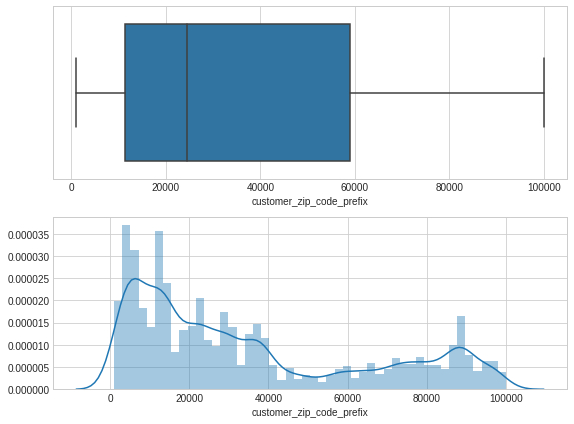

In [0]:
dfCustomers['customer_city']=dfCustomers['customer_city'].apply(strip_accents)
dfCustomers_perCustomer=dfCustomers.copy().drop_duplicates(['customer_unique_id'],keep='first')

fig,axes=plt.subplots(2,1,figsize=(8,3*2))
for func,axe in zip([sns.boxplot,sns.distplot],axes):
    ser=dfCustomers_perCustomer['customer_zip_code_prefix']
    func(ser,ax=axe,)
plt.tight_layout()

Total unique values in customer_city feature is 4118
Total unique values in customer_state feature is 27


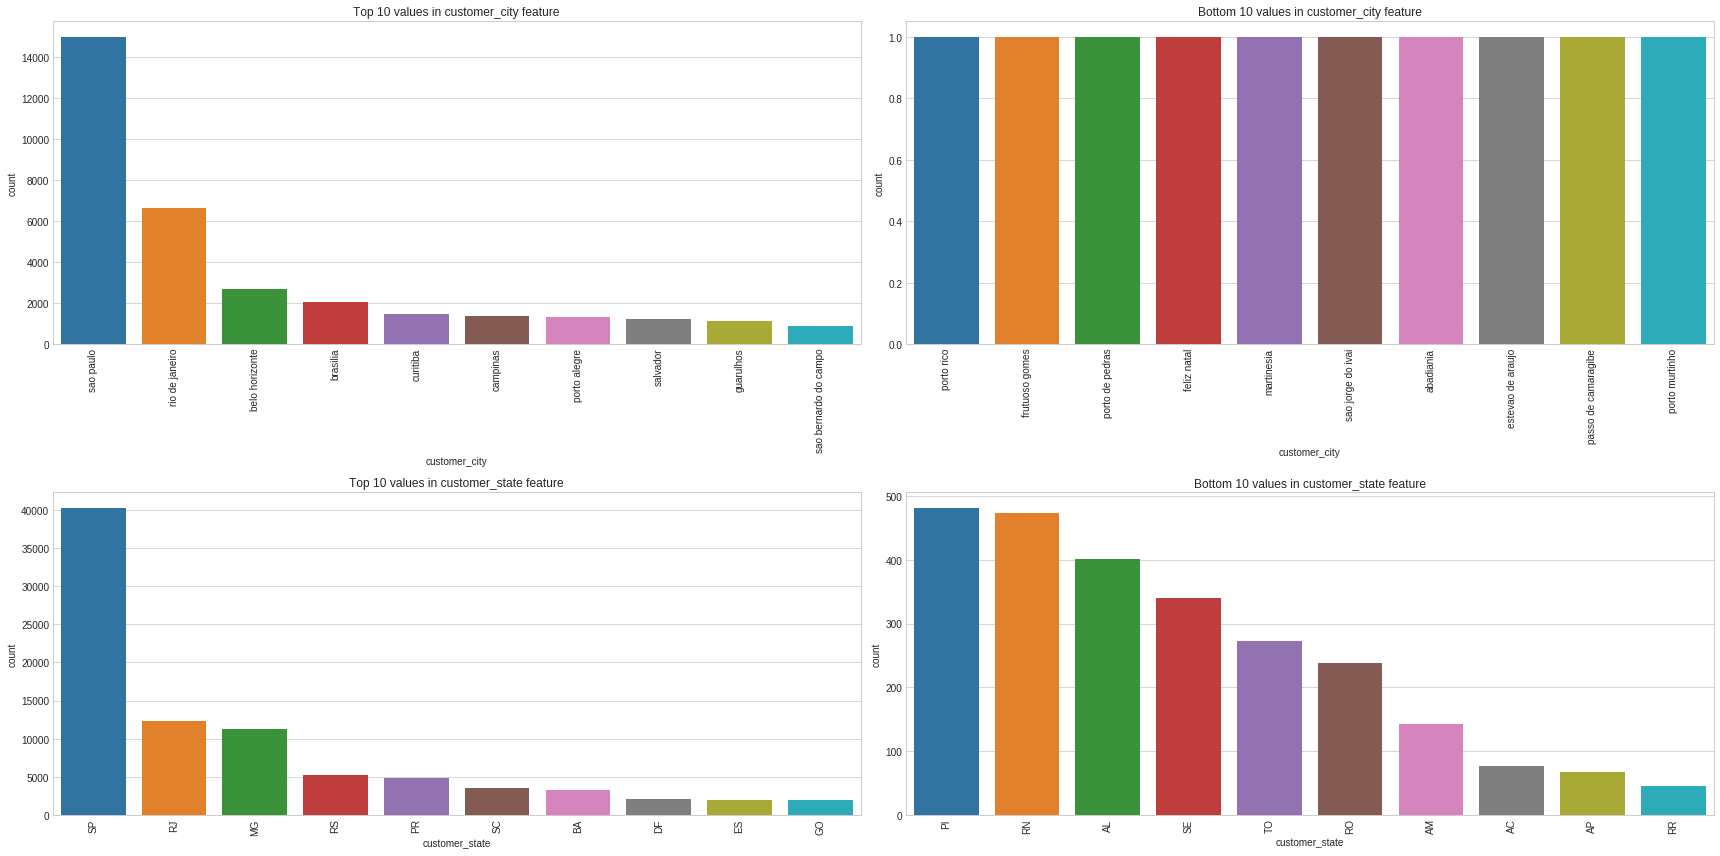

In [0]:
dfCustomers['customer_city']=dfCustomers['customer_city'].apply(strip_accents)
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(24,12))
for col,ax in zip(['customer_city','customer_state'],[ax1,ax2]):
    ser=dfCustomers_perCustomer[col]
    sns.countplot(ser,ax=ax[0],order=ser.value_counts().head(10).index)
    ax[0].tick_params('x',labelrotation=90)
    ax[0].set_title('Top 10 values in %s feature'%(col))
    sns.countplot(ser,ax=ax[1],order=ser.value_counts().tail(10).index)
    ax[1].tick_params('x',labelrotation=90)
    ax[1].set_title('Bottom 10 values in %s feature'%(col))
    print('Total unique values in %s feature is %s'%(col,ser.nunique()))
plt.tight_layout()

In [0]:
dfCustomers['customer_zip_code_prefix']=dfCustomers['customer_zip_code_prefix'].apply(zip_code_cleaning)
resumetable(dfCustomers)

dataType  null  nullPct  unique  \
dataFeatures                                               
customer_id                object     0      0.0   99441   
customer_unique_id         object     0      0.0   96096   
customer_zip_code_prefix   object     0      0.0   14994   
customer_city              object     0      0.0    4119   
customer_state             object     0      0.0      27   

                                               mostValue_1  mostValueCount_1  \
dataFeatures                                                                   
customer_id               8b5399b12eee8f2ce9e7fadd94b15d34               1.0   
customer_unique_id        8d50f5eadf50201ccdcedfb9e2ac8455              17.0   
customer_zip_code_prefix                             22790             142.0   
customer_city                                    sao paulo           15540.0   
customer_state                                          SP           41746.0   

                                               mostValue_2  mostValueCount_2  \
dataFeatures                                                                   
customer_id               af6838e132cd4b57f17378cfeca1d011               1.0   
customer_unique_id        3e43e6105506432c953e165fb2acf44c               9.0   
customer_zip_code_prefix                             24220             124.0   
customer_city                               rio de janeiro            6882.0   
customer_state                                          RJ           12852.0   

                                               mostValue_3  mostValueCount_3  \
dataFeatures                                                                   
customer_id               40c17557e54ccd8ccb7f592a2c1ce94f               1.0   
customer_unique_id        1b6c7548a2a1f9037c1fd3ddfed95f33               7.0   
customer_zip_code_prefix                             22793             121.0   
customer_city                               belo horizonte            2773.0   
customer_state                                          MG           11635.0   

                                              leastValue_1  leastValueCount_1  \
dataFeatures                                                                    
customer_id               688c5a754325b8c84629b9b436f9f51e                1.0   
customer_unique_id        ac43eb575838c88069e068dd164dd392                1.0   
customer_zip_code_prefix                             66914                1.0   
customer_city                               porto murtinho                1.0   
customer_state                                          RR               46.0   

                                              leastValue_2  leastValueCount_2  \
dataFeatures                                                                    
customer_id               7225c41233573a5e698cddb894951e51                1.0   
customer_unique_id        62710d18d2fc51ed913093daac4e9b0f                1.0   
customer_zip_code_prefix                             03014                1.0   
customer_city                              porto de pedras                1.0   
customer_state                                          AP               68.0   

                                              leastValue_3  leastValueCount_3  
dataFeatures                                                                   
customer_id               829961c76df2892a3b50656daaa764ed                1.0  
customer_unique_id        62c54bb25534d79bbbd52c3d9de4c1bc                1.0  
customer_zip_code_prefix                             20972                1.0  
customer_city                                   porto rico                1.0  
customer_state                                          AC               81.0

#### Cleaning
1. Changed zip_code_prefix type from integers to string (to keep the zip code consistent with 5 digits, including zip codes starting with 0)
2. Stripped accents from city name

#### Interesting Insights

1. Around 3000 customers in the dataset are new customers

### Sellers Dataset
#### Features in Sellers Dataset

1. seller_id = Generated ID for each seller in the dataset (this feature is the primary key for dataset merging)
2. seller_zip_code_prefix = Zip code where the order will be delivered from
3. seller_city = City where the order will be delivered from
4. seller_state = State where the order will be delivered from

In [0]:
dfSellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [0]:
dfSellers.shape

(3095, 4)

In [0]:
resumetable(dfSellers)

dataType  null  nullPct  unique  \
dataFeatures                                             
seller_id                object     0      0.0    3095   
seller_zip_code_prefix    int64     0      0.0    2246   
seller_city              object     0      0.0     611   
seller_state             object     0      0.0      23   

                                             mostValue_1  mostValueCount_1  \
dataFeatures                                                                 
seller_id               4b90495391ac0bd181a80a459df1e718               1.0   
seller_zip_code_prefix                             14940              49.0   
seller_city                                    sao paulo             694.0   
seller_state                                          SP            1849.0   

                                             mostValue_2  mostValueCount_2  \
dataFeatures                                                                 
seller_id               28f10b1c5e5abb9d4857745bede6147c               1.0   
seller_zip_code_prefix                             13660              10.0   
seller_city                                     curitiba             127.0   
seller_state                                          PR             349.0   

                                             mostValue_3  mostValueCount_3  \
dataFeatures                                                                 
seller_id               daf565f087a52def0fd5c5825b3661bc               1.0   
seller_zip_code_prefix                             16200               9.0   
seller_city                               rio de janeiro              96.0   
seller_state                                          MG             244.0   

                                            leastValue_1  leastValueCount_1  \
dataFeatures                                                                  
seller_id               c273175f7c6c80fb02f051e2fc6d0d72                1.0   
seller_zip_code_prefix                              2051                1.0   
seller_city                        campos dos goytacazes                1.0   
seller_state                                          PI                1.0   

                                            leastValue_2  leastValueCount_2  \
dataFeatures                                                                  
seller_id               6c17baf138731a4aaacc3210adf2037b                1.0   
seller_zip_code_prefix                             80430                1.0   
seller_city                                     itaborai                1.0   
seller_state                                          MA                1.0   

                                            leastValue_3  leastValueCount_3  
dataFeatures                                                                 
seller_id               48e5ee06fb2dc74df1c711a9b6dfac2a                1.0  
seller_zip_code_prefix                              5503                1.0  
seller_city                          sao miguel do oeste                1.0  
seller_state                                          PA                1.0

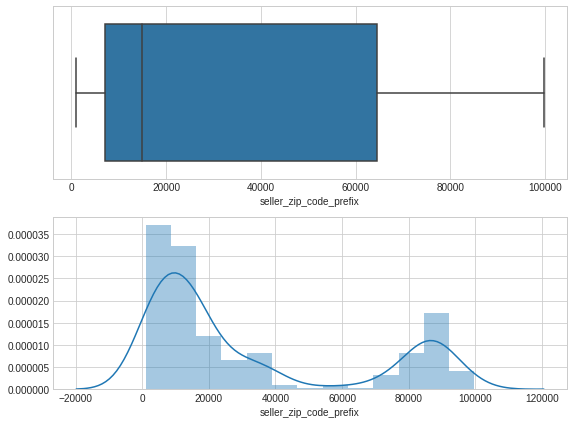

In [0]:
fig,axes=plt.subplots(2,1,figsize=(8,3*2))
for func,axe in zip([sns.boxplot,sns.distplot],axes):
    ser=dfSellers['seller_zip_code_prefix'].astype('float')
    func(ser,ax=axe,)
plt.tight_layout()

Total unique values in seller_city feature is 610
Total unique values in seller_state feature is 23


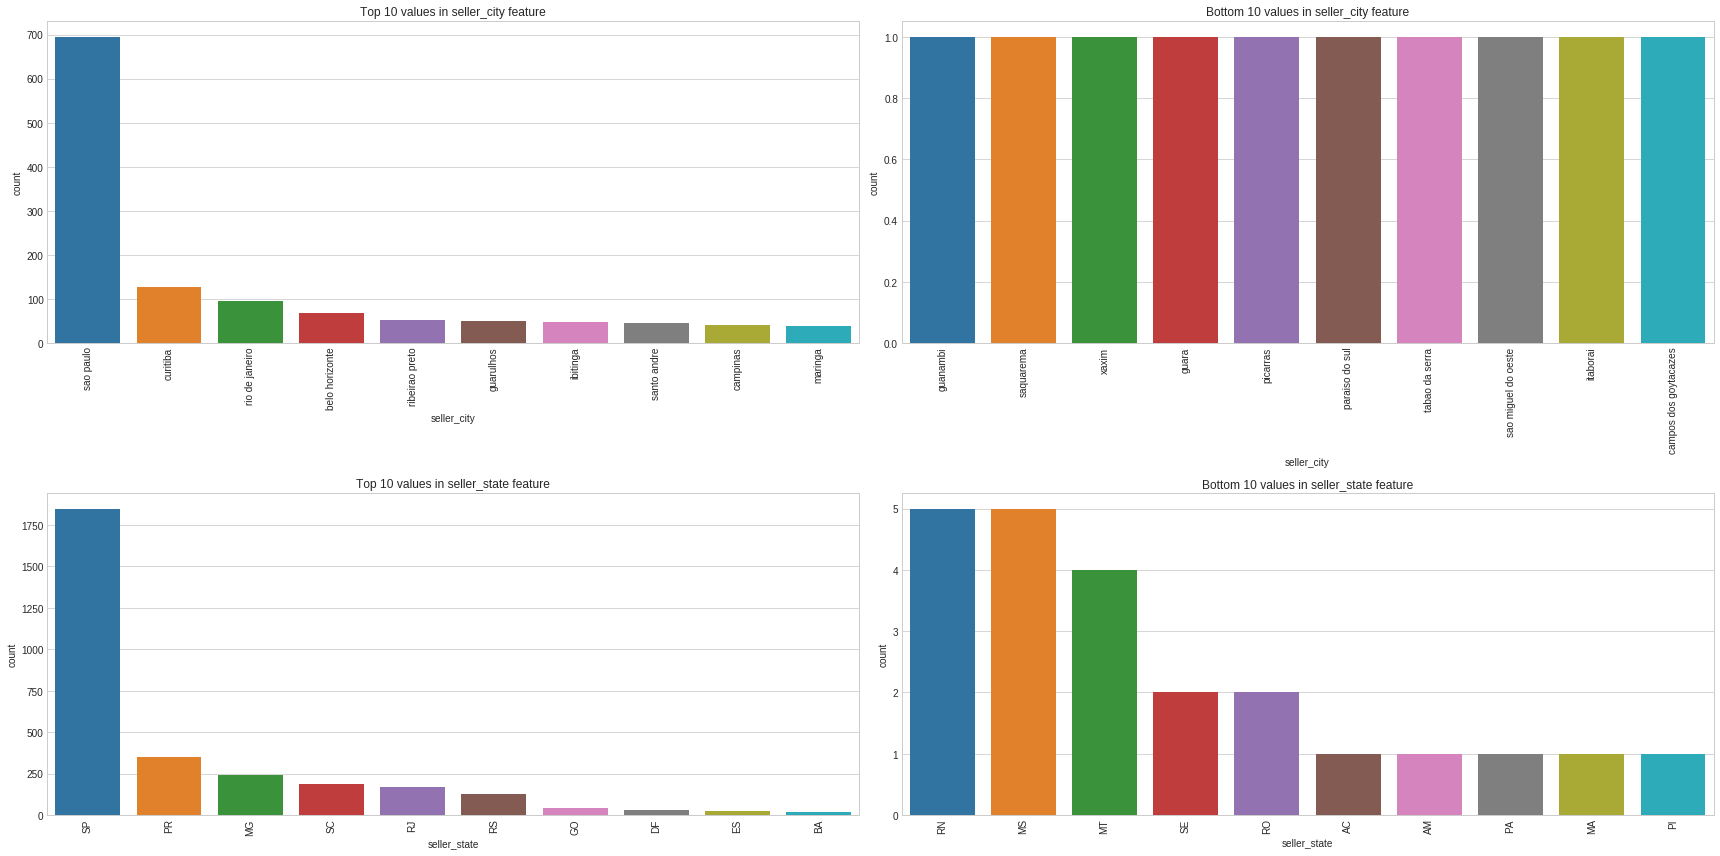

In [0]:
dfSellers['seller_city']=dfSellers['seller_city'].apply(strip_accents)
fig,(ax1,ax2) = plt.subplots(2,2,figsize=(24,12))
for col,ax in zip(['seller_city','seller_state'],[ax1,ax2]):
    ser=dfSellers[col]
    sns.countplot(ser,ax=ax[0],order=ser.value_counts().head(10).index)
    ax[0].tick_params('x',labelrotation=90)
    ax[0].set_title('Top 10 values in %s feature'%(col))
    sns.countplot(ser,ax=ax[1],order=ser.value_counts().tail(10).index)
    ax[1].tick_params('x',labelrotation=90)
    ax[1].set_title('Bottom 10 values in %s feature'%(col))
    print('Total unique values in %s feature is %s'%(col,ser.nunique()))
plt.tight_layout()

In [0]:
dfSellers['seller_zip_code_prefix']=dfSellers['seller_zip_code_prefix'].apply(zip_code_cleaning)
resumetable(dfSellers)

dataType  null  nullPct  unique  \
dataFeatures                                             
seller_id                object     0      0.0    3095   
seller_zip_code_prefix   object     0      0.0    2246   
seller_city              object     0      0.0     610   
seller_state             object     0      0.0      23   

                                             mostValue_1  mostValueCount_1  \
dataFeatures                                                                 
seller_id               4b90495391ac0bd181a80a459df1e718               1.0   
seller_zip_code_prefix                             14940              49.0   
seller_city                                    sao paulo             695.0   
seller_state                                          SP            1849.0   

                                             mostValue_2  mostValueCount_2  \
dataFeatures                                                                 
seller_id               28f10b1c5e5abb9d4857745bede6147c               1.0   
seller_zip_code_prefix                             13660              10.0   
seller_city                                     curitiba             127.0   
seller_state                                          PR             349.0   

                                             mostValue_3  mostValueCount_3  \
dataFeatures                                                                 
seller_id               daf565f087a52def0fd5c5825b3661bc               1.0   
seller_zip_code_prefix                             16200               9.0   
seller_city                               rio de janeiro              96.0   
seller_state                                          MG             244.0   

                                            leastValue_1  leastValueCount_1  \
dataFeatures                                                                  
seller_id               c273175f7c6c80fb02f051e2fc6d0d72                1.0   
seller_zip_code_prefix                             02851                1.0   
seller_city                        campos dos goytacazes                1.0   
seller_state                                          PI                1.0   

                                            leastValue_2  leastValueCount_2  \
dataFeatures                                                                  
seller_id               6c17baf138731a4aaacc3210adf2037b                1.0   
seller_zip_code_prefix                             37400                1.0   
seller_city                                     itaborai                1.0   
seller_state                                          MA                1.0   

                                            leastValue_3  leastValueCount_3  
dataFeatures                                                                 
seller_id               48e5ee06fb2dc74df1c711a9b6dfac2a                1.0  
seller_zip_code_prefix                             09640                1.0  
seller_city                          sao miguel do oeste                1.0  
seller_state                                          PA                1.0

#### Cleaning
1. Changed zip_code_prefix type from integers to string (to keep the zip code consistent with 5 digits, including zip codes starting with 0)
2. Stripped accents from city name

#### Interesting Insights

1. 20% of the sellers are located in Sao Paulo

## Dataset Dump
Dataset is dumped to be analysed further on another notebook

In [0]:
def check_row_names():
    dupes=[]
    pks=['order_id','customer_id','product_id','seller_id','zip_code_prefix']
    print('%s shape is %s'%('product_category_translate',product_category_translate.shape))
    for name_1,df_1 in zip(dataframes,dfs):
        print('%s shape is %s'%(name_1,df_1.shape))
        for name_2,df_2 in zip(dataframes,dfs):
            if list(df_1.columns)!=list(df_2.columns):
                for col_1 in df_1.columns:
                    for col_2 in df_2.columns:
                        if col_1==col_2 and col_1 not in pks:
                            dupes.append(col_1)
                if len(dupes)>0:
                    print('%s and %s has duplicate columns names, the duplicates are listed below.'%(name_1,name_2))
                    print(dupes)
            dupes=[]

    print('Finished checking for duplicate columns.')
check_row_names()

In [0]:
for name,df in zip(dataframes,dfs):
    pickle.dump(df,open(f'pkl_{name}.csv','wb'))